<a href="https://colab.research.google.com/github/Andrea-Giuseppe-Cavallaro/data-analysis/blob/main/airBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importo librerie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.graph_objects as go
import plotly.colors as pc
from google.colab import drive
import os

## Caricamento CSV e Macroanalisi

In [2]:
# Montaggio Google Drive
drive.mount('/content/drive')
# Cambio directory di lavoro
os.chdir('/content/drive/MyDrive/Colab Notebooks/EsameDataAnalisi')

Mounted at /content/drive


In [3]:
# Caricamento dataset
listings = pd.read_csv('listings.csv', sep=',')
reviews = pd.read_csv('reviews.csv', sep=',')
listings_df = pd.DataFrame(listings)
reviews_df = pd.DataFrame(reviews)

In [4]:
print(f"Dataset caricati:")
print(f"- Listings: {listings.shape[0]} righe, {listings.shape[1]} colonne")
print(f"- Reviews: {reviews.shape[0]} righe, {reviews.shape[1]} colonne")

Dataset caricati:
- Listings: 52472 righe, 79 colonne
- Reviews: 1058404 righe, 6 colonne


In [5]:
print(f"- Listings: {listings.info()}")
print(f"- Reviews: {reviews.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52472 entries, 0 to 52471
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            52472 non-null  int64  
 1   listing_url                                   52472 non-null  object 
 2   scrape_id                                     52472 non-null  int64  
 3   last_scraped                                  52472 non-null  object 
 4   source                                        52472 non-null  object 
 5   name                                          52472 non-null  object 
 6   description                                   50959 non-null  object 
 7   neighborhood_overview                         23073 non-null  object 
 8   picture_url                                   52472 non-null  object 
 9   host_id                                       52472 non-null 

In [6]:
print(f"Dataset head:")
print(f"- Listings: {listings.head()}")
print(f"- Reviews: {reviews.head()}")

Dataset head:
- Listings:       id                         listing_url       scrape_id last_scraped  \
0   7011   https://www.airbnb.com/rooms/7011  20250326054816   2025-03-27   
1  22948  https://www.airbnb.com/rooms/22948  20250326054816   2025-03-31   
2  35264  https://www.airbnb.com/rooms/35264  20250326054816   2025-03-26   
3  43992  https://www.airbnb.com/rooms/43992  20250326054816   2025-03-27   
4  43995  https://www.airbnb.com/rooms/43995  20250326054816   2025-03-28   

        source                                               name  \
0  city scrape               SEASIDE - Historic Antique Residence   
1  city scrape  BnB center near station with balcony and break...   
2  city scrape                         Etna-sea a panoramic villa   
3  city scrape                             Two steps from the sea   
4  city scrape                                    Villa Verdemare   

                                         description  \
0  WINEYARD WITH COLOURS OF THE SEASIDE.

In [7]:
print(f"Dataset describe:")
print(f"- Listings: {listings.describe()}")
print(f"- Reviews: {reviews.describe()}")

Dataset describe:
- Listings:                  id     scrape_id       host_id  host_listings_count  \
count  5.247200e+04  5.247200e+04  5.247200e+04         52461.000000   
mean   5.459112e+17  2.025033e+13  2.525442e+08            39.702026   
std    5.349490e+17  2.331663e+01  2.140111e+08           156.149789   
min    7.011000e+03  2.025033e+13  1.688800e+04             1.000000   
25%    2.837922e+07  2.025033e+13  4.428557e+07             1.000000   
50%    6.255680e+17  2.025033e+13  1.913972e+08             3.000000   
75%    1.094085e+18  2.025033e+13  4.645318e+08             6.000000   
max    1.384528e+18  2.025033e+13  6.860759e+08          2444.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               52461.000000                           0.0  52472.000000   
mean                   71.747603                           NaN     37.637421   
std                   307.927895                           NaN      0.535950   
m

In [8]:
print(f"Dataset value_counts:")
print(f"- Listings: {listings['price'].value_counts(dropna=False)}")

Dataset value_counts:
- Listings: price
NaN          4932
$60.00       1102
$50.00       1083
$80.00       1061
$90.00        980
             ... 
$2,820.00       1
$658.00         1
$1,700.00       1
$2,125.00       1
$1,041.00       1
Name: count, Length: 1039, dtype: int64


In [9]:
print(f"Dataset value_counts:")
print(f"- Reviews: {listings['room_type'].value_counts(dropna=False)}")

Dataset value_counts:
- Reviews: room_type
Entire home/apt    42183
Private room        9982
Hotel room           271
Shared room           36
Name: count, dtype: int64


In [10]:
print(f"Dataset value_counts:")
print(f"- Reviews: {listings['accommodates'].value_counts(dropna=False)}")

Dataset value_counts:
- Reviews: accommodates
4     16321
2     11678
6      6635
3      5901
5      5268
8      2179
7      1424
10      878
9       462
12      421
1       391
16      341
11      219
14      183
13      104
15       67
Name: count, dtype: int64


## Pulizia dati e costruzione dataset

In [11]:
# Pulizia colonna price - rimozione valori null e conversione a float
listings.dropna(subset=['price'], inplace=True)
listings['price_clean'] = listings['price'].replace('[\\$,]', '', regex=True).astype(float)

In [12]:
# Aggiunta conteggio recensioni per ogni listing
review_count = reviews['listing_id'].value_counts().reset_index()
review_count.columns = ['id', 'review_count']
listings = pd.merge(listings, review_count, on='id', how='left')

In [13]:
# Definizione aree della provincia di Catania
catania_areas = [
    "Aci Bonaccorsi", "Aci Castello", "Aci Catena", "Aci Sant'Antonio",
    "Acireale", "Adrano", "Belpasso", "Biancavilla", "Bronte",
    "Calatabiano", "Caltagirone", "Camporotondo Etneo", "Castel di Iudica",
    "Castiglione di Sicilia", "Catania", "Fiumefreddo di Sicilia",
    "Giarre", "Grammichele", "Gravina di Catania", "Licodia Eubea",
    "Linguaglossa", "Maletto", "Maniace", "Mascali", "Mascalucia",
    "Mazzarrone", "Militello in Val di Catania", "Milo", "Mineo",
    "Mirabella Imbaccari", "Misterbianco", "Motta Sant'Anastasia",
    "Nicolosi", "Palagonia", "Paternò", "Pedara", "Piedimonte Etneo",
    "Raddusa", "Ragalna", "Ramacca", "Randazzo", "Riposto",
    "San Cono", "San Giovanni la Punta", "San Gregorio di Catania",
    "San Michele di Ganzaria", "San Pietro Clarenza",
    "Sant'Agata li Battiati", "Sant'Alfio", "Santa Maria di Licodia",
    "Santa Venerina", "Scordia", "Trecastagni", "Tremestieri Etneo",
    "Valverde", "Viagrande", "Vizzini", "Zafferana Etnea"
]

# Filtro per aree di Catania
listings = listings[listings['neighbourhood_cleansed'].isin(catania_areas)]

In [14]:
# Conversione date e filtro per host attivi
reviews['date'] = pd.to_datetime(reviews['date'])

# Trova ultima recensione per ogni listing per identificare host attivi
latest_review_date = reviews.groupby('listing_id')['date'].max().reset_index()
latest_review_date.columns = ['id', 'latest_review_date']
listings = pd.merge(listings, latest_review_date, on='id', how='left')

# Rimuovi host con ultima recensione prima del 2024 (inattivi)
hosts_to_remove = listings[listings['latest_review_date'] < '2024-01-01']['host_id'].unique()
listings = listings[~listings['host_id'].isin(hosts_to_remove)]

# Trova prima recensione per ogni host per escludere nuovi host 2025
first_review_year = reviews.groupby('listing_id')['date'].min().dt.year.reset_index()
first_review_year.columns = ['host_id', 'first_review_year']
listings = pd.merge(listings, first_review_year, on='host_id', how='left')

# Rimuovi host con prima recensione nel 2025
hosts_2025 = listings[listings['first_review_year'] == 2025]['host_id'].unique()
listings = listings[~listings['host_id'].isin(hosts_2025)]

In [15]:
# Rimozione outlier di prezzo usando 95° percentile
price_threshold = listings['price_clean'].quantile(0.95)
listings = listings[listings['price_clean'] <= price_threshold].copy()

In [16]:
# Filtro per tipi di stanza rilevanti (esclude hotel room e shared room)
listings = listings[listings['room_type'].isin(['Entire home/apt', 'Private room'])].copy()

In [17]:
# Creazione gruppi per numero di persone ospitabili
listings['accommodates_group'] = np.where(listings['accommodates'] >= 8, '8 o più',
                                         listings['accommodates'].astype(str))

print(f"Dataset prima pulizia:")
print(f"- Listings: {len(listings_df)} annunci")
print(f"- Host unici: {listings_df['host_id'].nunique()}")
print(f"- Tipi di stanza: {listings_df['room_type'].unique()}")

print(f"\nDataset dopo pulizia:")
print(f"- Listings: {len(listings)} annunci")
print(f"- Host unici: {listings['host_id'].nunique()}")
print(f"- Limite prezzo (95° percentile): ${price_threshold:.2f}")
print(f"- Tipi di stanza: {listings['room_type'].unique()}")

Dataset prima pulizia:
- Listings: 52472 annunci
- Host unici: 27221
- Tipi di stanza: ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']

Dataset dopo pulizia:
- Listings: 4986 annunci
- Host unici: 3286
- Limite prezzo (95° percentile): $320.00
- Tipi di stanza: ['Entire home/apt' 'Private room']


## Panoramice Dataset

Totale annunci: 4986
Annunci unici: 4986
Host unici: 3286
Tipi di stanza disponibili: ['Entire home/apt' 'Private room']
Media dei prezzi: $80.32
Mediana dei prezzi: $68.00


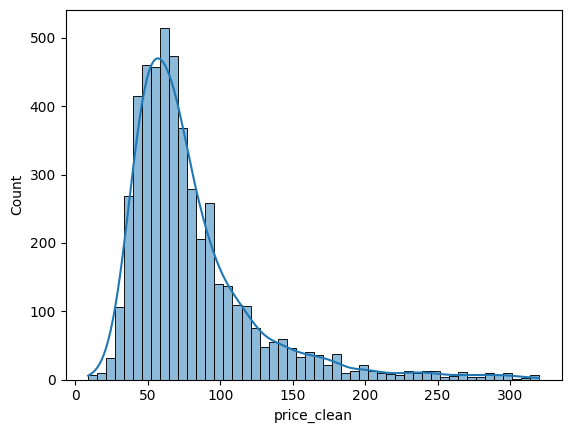

In [18]:
# Statistiche generali
print(f"Totale annunci: {len(listings)}")
print(f"Annunci unici: {listings['id'].nunique()}")
print(f"Host unici: {listings['host_id'].nunique()}")
print(f"Tipi di stanza disponibili: {listings['room_type'].unique()}")
print(f"Media dei prezzi: ${listings['price_clean'].mean():.2f}")
print(f"Mediana dei prezzi: ${listings['price_clean'].median():.2f}")

sns.histplot(data=listings, x='price_clean', bins=50, kde=True)
plt.show()


Distribuzione per tipo di host:
- Superhost: 1438 (28.8%)
- Host regolari: 3431 (68.8%)


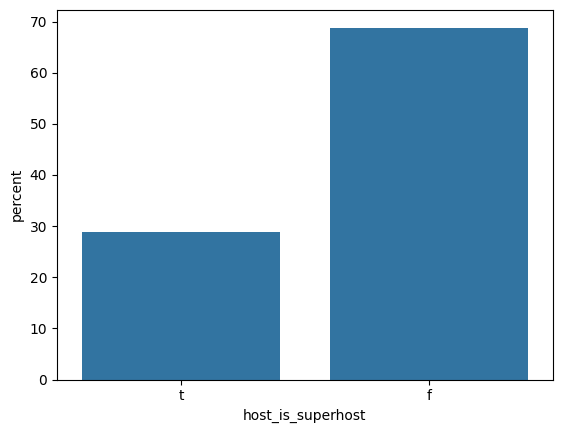

In [19]:
# Divisione per tipo di host
superhost = listings[listings['host_is_superhost'] == 't'].copy()
non_superhost = listings[listings['host_is_superhost'] == 'f'].copy()

print(f"\nDistribuzione per tipo di host:")
print(f"- Superhost: {len(superhost)} ({len(superhost)/len(listings)*100:.1f}%)")
print(f"- Host regolari: {len(non_superhost)} ({len(non_superhost)/len(listings)*100:.1f}%)")

sns.countplot(data=listings, x='host_is_superhost', stat='percent')
plt.show()


Distribuzione tipi di stanza:
room_type
Entire home/apt    4025
Private room        961
Name: count, dtype: int64


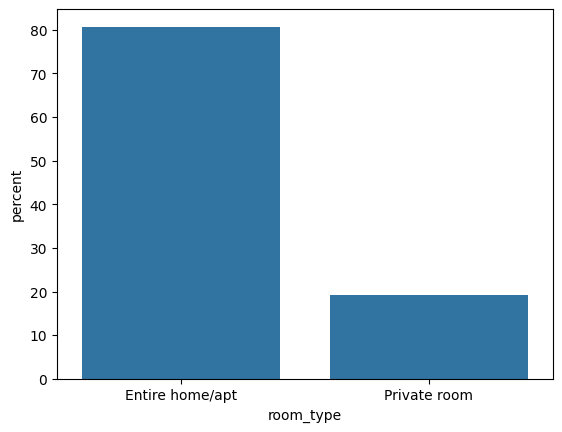

In [20]:
# Conteggio per tipo di stanza
print(f"\nDistribuzione tipi di stanza:")
print(listings['room_type'].value_counts())

sns.countplot(data=listings, x='room_type', stat='percent')
plt.show()

## Statistiche descrittive

In [21]:
# Statistiche prezzi
print("\nPREZZI ($) - SUPERHOST:")
superhost_price_stats = superhost['price_clean'].describe()
for stat, value in superhost_price_stats.items():
    if stat == 'count':
        print(f"  {stat.capitalize():<6}: {value:.0f}")
    else:
        print(f"  {stat.capitalize():<6}: ${value:.2f}")

print("\nPREZZI ($) - HOST REGOLARI:")
host_price_stats = non_superhost['price_clean'].describe()
for stat, value in host_price_stats.items():
    if stat == 'count':
        print(f"  {stat.capitalize():<6}: {value:.0f}")
    else:
        print(f"  {stat.capitalize():<6}: ${value:.2f}")


PREZZI ($) - SUPERHOST:
  Count : 1438
  Mean  : $80.42
  Std   : $46.66
  Min   : $18.00
  25%   : $51.00
  50%   : $67.00
  75%   : $92.00
  Max   : $319.00

PREZZI ($) - HOST REGOLARI:
  Count : 3431
  Mean  : $80.73
  Std   : $44.68
  Min   : $9.00
  25%   : $52.00
  50%   : $69.00
  75%   : $93.50
  Max   : $320.00


In [22]:
# Statistiche review scores (rimuovendo valori null)
superhost_reviews = superhost['review_scores_rating'].dropna()
host_reviews = non_superhost['review_scores_rating'].dropna()

print("\nREVIEW SCORES - SUPERHOST:")
for stat, value in superhost_reviews.describe().items():
    print(f"  {stat.capitalize():<6}: {value:.2f}")

print("\nREVIEW SCORES - HOST REGOLARI:")
for stat, value in host_reviews.describe().items():
    print(f"  {stat.capitalize():<6}: {value:.2f}")


REVIEW SCORES - SUPERHOST:
  Count : 1363.00
  Mean  : 4.88
  Std   : 0.12
  Min   : 4.00
  25%   : 4.82
  50%   : 4.90
  75%   : 4.96
  Max   : 5.00

REVIEW SCORES - HOST REGOLARI:
  Count : 2011.00
  Mean  : 4.71
  Std   : 0.41
  Min   : 1.00
  25%   : 4.60
  50%   : 4.80
  75%   : 5.00
  Max   : 5.00


In [23]:
# Statistiche numero recensioni
print("\nNUMERO RECENSIONI - SUPERHOST:")
superhost_count_stats = superhost['review_count'].describe()
for stat, value in superhost_count_stats.items():
    print(f"  {stat.capitalize():<6}: {value:.2f}")

print("\nNUMERO RECENSIONI - HOST REGOLARI:")
host_count_stats = non_superhost['review_count'].describe()
for stat, value in host_count_stats.items():
    print(f"  {stat.capitalize():<6}: {value:.2f}")


NUMERO RECENSIONI - SUPERHOST:
  Count : 1363.00
  Mean  : 72.61
  Std   : 86.78
  Min   : 1.00
  25%   : 17.00
  50%   : 42.00
  75%   : 96.00
  Max   : 707.00

NUMERO RECENSIONI - HOST REGOLARI:
  Count : 2011.00
  Mean  : 30.15
  Std   : 57.95
  Min   : 1.00
  25%   : 3.00
  50%   : 8.00
  75%   : 31.00
  Max   : 671.00


## Grafici

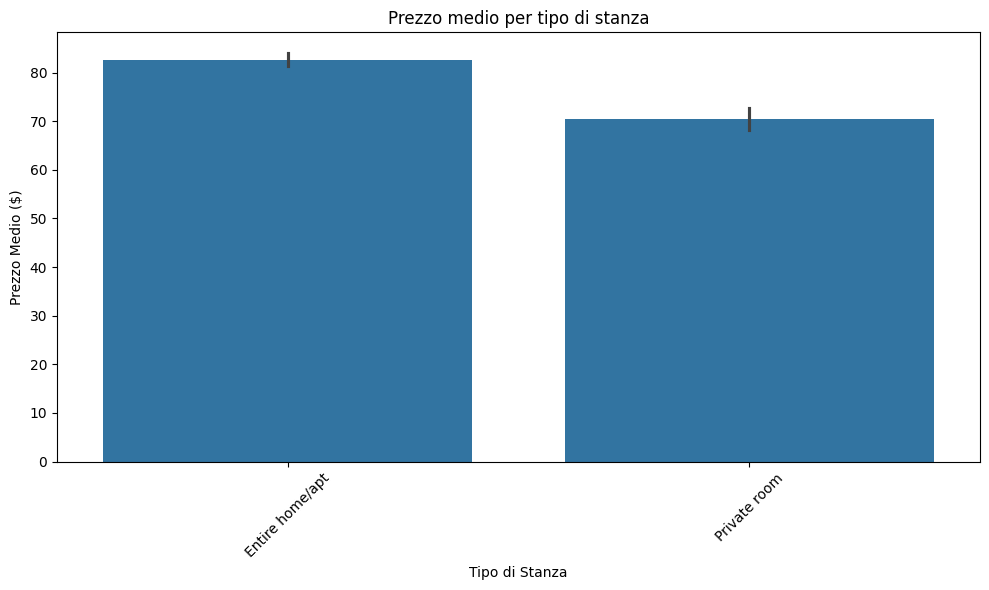

In [24]:
# 1. Prezzo medio per tipo di stanza
plt.figure(figsize=(10, 6))
sns.barplot(data=listings, x='room_type', y='price_clean')
plt.title('Prezzo medio per tipo di stanza')
plt.xlabel('Tipo di Stanza')
plt.ylabel('Prezzo Medio ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

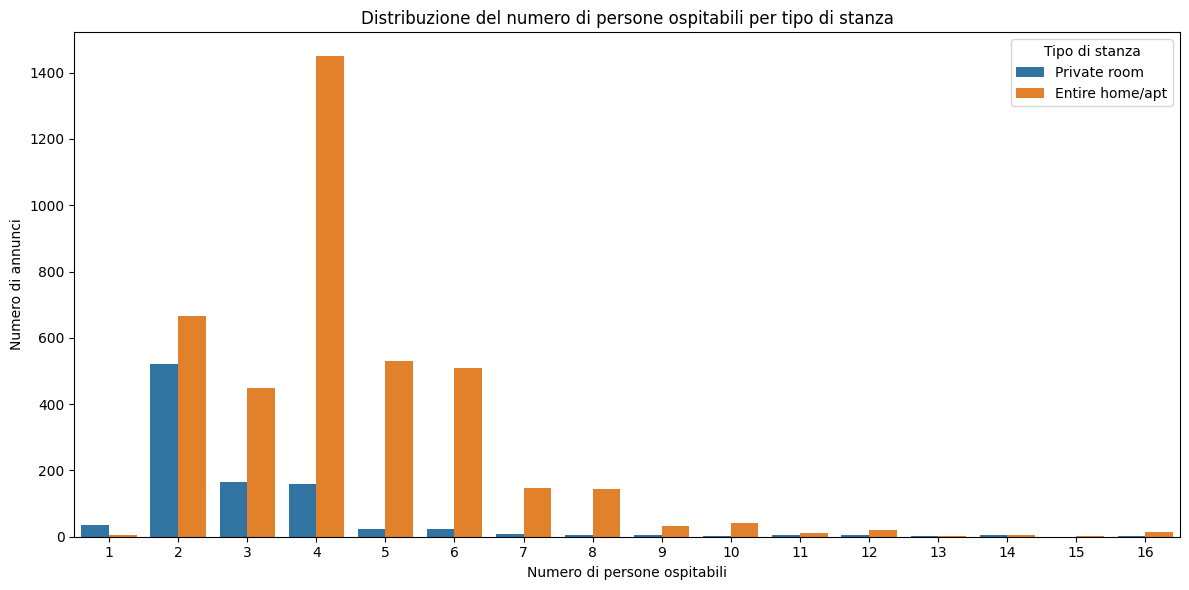

In [25]:
# 2. Distribuzione numero persone ospitabili per tipo stanza
selected_rooms = listings[listings['room_type'].isin(['Private room', 'Entire home/apt'])].copy()

plt.figure(figsize=(12, 6))
sns.countplot(
    data=selected_rooms,
    x='accommodates',
    hue='room_type',
    order=sorted(selected_rooms['accommodates'].unique())
)
plt.title('Distribuzione del numero di persone ospitabili per tipo di stanza')
plt.xlabel('Numero di persone ospitabili')
plt.ylabel('Numero di annunci')
plt.legend(title='Tipo di stanza')
plt.tight_layout()
plt.show()

In [26]:
# 3. Analisi prezzi per gruppo di persone e tipo di host
grouped_host = listings.groupby(['room_type', 'accommodates_group', 'host_is_superhost']).agg(
    mean_price=('price_clean', 'mean')
).reset_index()

# Conversione per calcoli numerici
grouped_host['accommodates_numeric'] = grouped_host['accommodates_group'].replace({'8 o più': 8}).astype(int)
grouped_host['price_per_person'] = grouped_host['mean_price'] / grouped_host['accommodates_numeric']

# Etichette leggibili
grouped_host['Tipo host'] = grouped_host['host_is_superhost'].map({'t': 'Superhost', 'f': 'Host'})
grouped_host = grouped_host.rename(columns={
    'room_type': 'Tipo stanza',
    'accommodates_group': 'Numero persone (gruppo)',
    'mean_price': 'Prezzo medio ($)',
    'price_per_person': 'Prezzo per persona ($)'
})

# Arrotondamento valori
grouped_host[['Prezzo medio ($)', 'Prezzo per persona ($)']] = grouped_host[[
    'Prezzo medio ($)', 'Prezzo per persona ($)'
]].round(2)

# Stampa tabella riepilogativa
print("\nTabella con confronto tra Host e Superhost:")
print(grouped_host[['Tipo stanza', 'Numero persone (gruppo)', 'Tipo host',
                   'Prezzo medio ($)', 'Prezzo per persona ($)']].to_string(index=False))


Tabella con confronto tra Host e Superhost:
    Tipo stanza Numero persone (gruppo) Tipo host  Prezzo medio ($)  Prezzo per persona ($)
Entire home/apt                       1      Host             52.75                   52.75
Entire home/apt                       2      Host             67.59                   33.80
Entire home/apt                       2 Superhost             68.48                   34.24
Entire home/apt                       3      Host             63.92                   21.31
Entire home/apt                       3 Superhost             61.72                   20.57
Entire home/apt                       4      Host             77.11                   19.28
Entire home/apt                       4 Superhost             77.81                   19.45
Entire home/apt                       5      Host             79.78                   15.96
Entire home/apt                       5 Superhost             85.07                   17.01
Entire home/apt                    

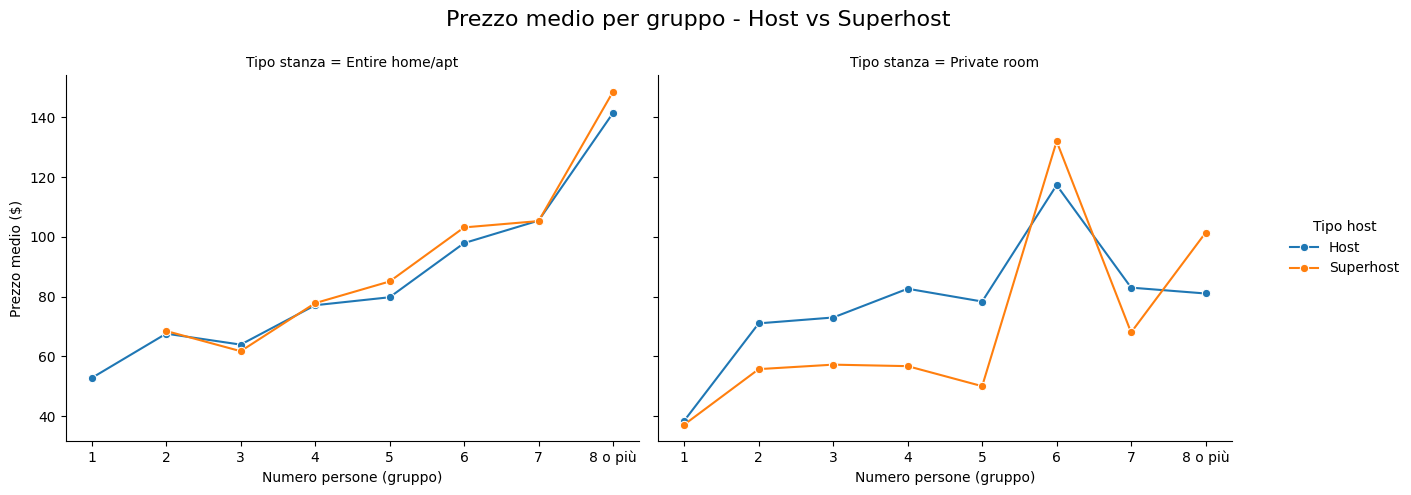

In [27]:
# 4. Grafici comparativi prezzo medio
g1 = sns.FacetGrid(
    grouped_host, col='Tipo stanza', hue='Tipo host',
    height=5, aspect=1.3, margin_titles=True
)
g1.map(sns.lineplot, 'Numero persone (gruppo)', 'Prezzo medio ($)', marker='o')
g1.add_legend(title='Tipo host')
g1.set_axis_labels("Numero persone (gruppo)", "Prezzo medio ($)")
g1.fig.subplots_adjust(top=0.85)
g1.fig.suptitle("Prezzo medio per gruppo - Host vs Superhost", fontsize=16)
plt.show()

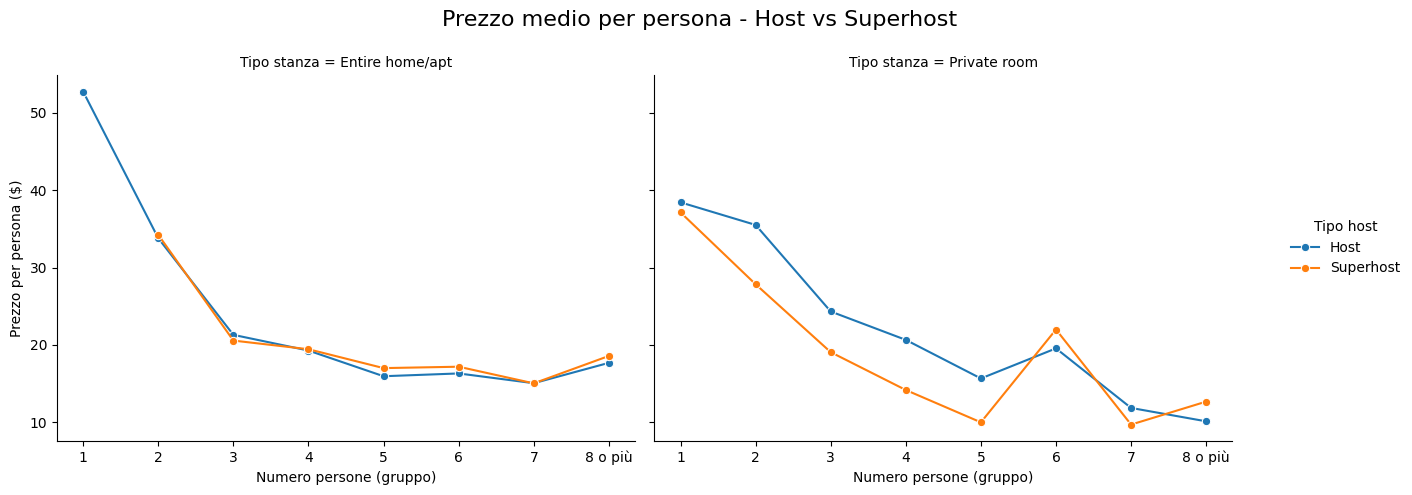

In [28]:
# 5. Grafici comparativi prezzo per persona
g2 = sns.FacetGrid(
    grouped_host, col='Tipo stanza', hue='Tipo host',
    height=5, aspect=1.3, margin_titles=True
)
g2.map(sns.lineplot, 'Numero persone (gruppo)', 'Prezzo per persona ($)', marker='o')
g2.add_legend(title='Tipo host')
g2.set_axis_labels("Numero persone (gruppo)", "Prezzo per persona ($)")
g2.fig.subplots_adjust(top=0.85)
g2.fig.suptitle("Prezzo medio per persona - Host vs Superhost", fontsize=16)
plt.show()

In [29]:
# 6. Diagramma Sankey per visualizzare flussi
sankey_df = listings.copy()
sankey_df['host_type'] = sankey_df['host_is_superhost'].map({'t': 'Superhost', 'f': 'Host'})

# Preparazione dati per Sankey
cols = ['host_type', 'room_type', 'accommodates_group']
flow_counts = sankey_df.groupby(cols).size().reset_index(name='count')

# Creazione etichette e mapping
labels = pd.unique(flow_counts[cols[0]].tolist() +
                  flow_counts[cols[1]].tolist() +
                  flow_counts[cols[2]].tolist())
label_dict = {label: i for i, label in enumerate(labels)}

# Creazione collegamenti per il diagramma
source, target, value = [], [], []

# Collegamenti host_type → room_type
level1 = flow_counts.groupby([cols[0], cols[1]])['count'].sum().reset_index()
for _, row in level1.iterrows():
    source.append(label_dict[row[cols[0]]])
    target.append(label_dict[row[cols[1]]])
    value.append(row['count'])

# Collegamenti room_type → accommodates_group
level2 = flow_counts.groupby([cols[1], cols[2]])['count'].sum().reset_index()
for _, row in level2.iterrows():
    source.append(label_dict[row[cols[1]]])
    target.append(label_dict[row[cols[2]]])
    value.append(row['count'])

# Assegnazione colori ai collegamenti
color_palette = pc.qualitative.Set3
link_colors = [color_palette[i % len(color_palette)] for i in range(len(source))]

# Creazione e visualizzazione diagramma Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15, thickness=20,
        line=dict(color="black", width=0.5),
        label=labels, color="lightgray"
    ),
    link=dict(
        source=source, target=target, value=value,
        color=link_colors
    )
)])

fig.update_layout(title_text="Flusso: Host → Tipo stanza → Numero persone", font_size=12)
fig.show()

/tmp/ipython-input-29-2471334900.py:10: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  labels = pd.unique(flow_counts[cols[0]].tolist() +


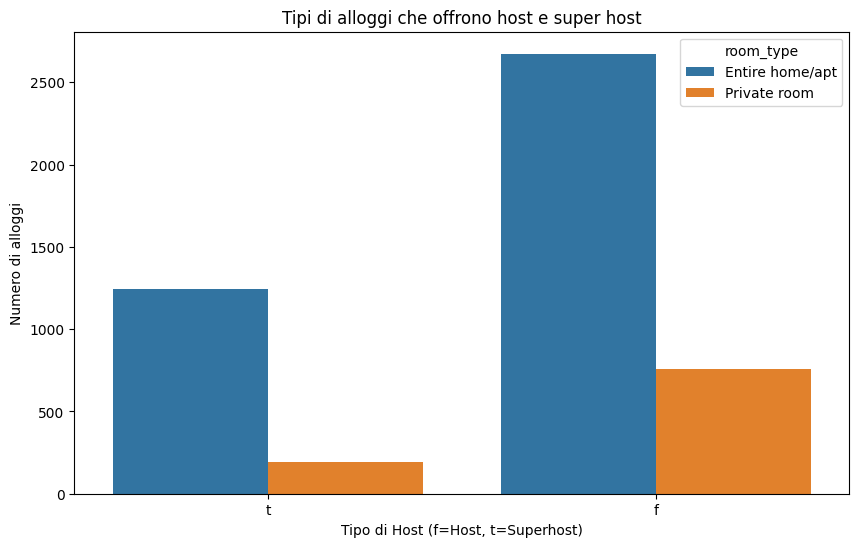

In [30]:
# 7. Confronto tipi di alloggi offerti da host e superhost
plt.figure(figsize=(10, 6))
sns.countplot(data=listings, x='host_is_superhost', hue='room_type')
plt.title('Tipi di alloggi che offrono host e super host')
plt.xlabel('Tipo di Host (f=Host, t=Superhost)')
plt.ylabel('Numero di alloggi')
plt.show()

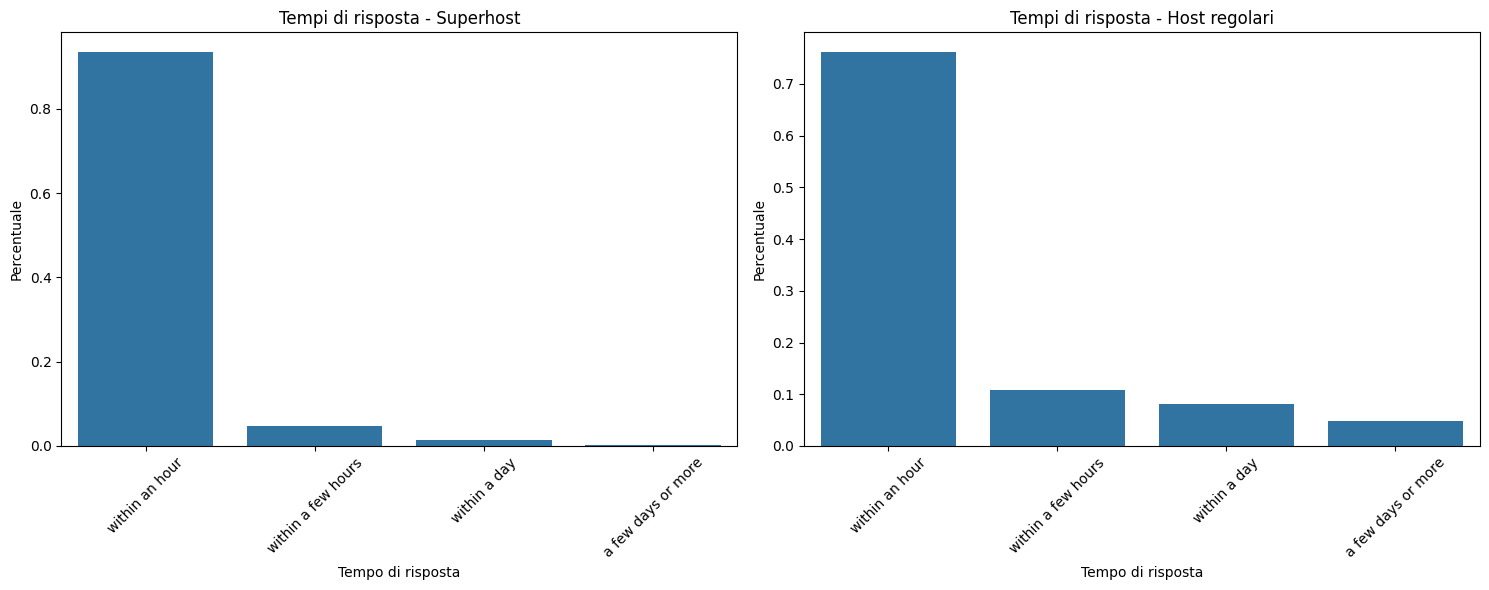

In [31]:
# 8. Confronto tempi di risposta
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Superhost tempi di risposta
superhost_response = superhost['host_response_time'].value_counts(normalize=True)
sns.barplot(x=superhost_response.index, y=superhost_response.values, ax=axes[0])
axes[0].set_title('Tempi di risposta - Superhost')
axes[0].set_xlabel('Tempo di risposta')
axes[0].set_ylabel('Percentuale')
axes[0].tick_params(axis='x', rotation=45)

# Host regolari tempi di risposta
host_response = non_superhost['host_response_time'].value_counts(normalize=True)
sns.barplot(x=host_response.index, y=host_response.values, ax=axes[1])
axes[1].set_title('Tempi di risposta - Host regolari')
axes[1].set_xlabel('Tempo di risposta')
axes[1].set_ylabel('Percentuale')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Analisi Amenities

In [32]:
# Parsing amenities per superhost
all_amenities_super = []
for item in superhost['amenities'].dropna():
    item = item.strip('{}').replace('"', '').split(',')
    all_amenities_super.extend([x.strip() for x in item])
superhost_amenities = Counter(all_amenities_super)

# Parsing amenities per host regolari
all_amenities_host = []
for item in non_superhost['amenities'].dropna():
    item = item.strip('{}').replace('"', '').split(',')
    all_amenities_host.extend([x.strip() for x in item])
host_amenities = Counter(all_amenities_host)

In [33]:
# Calcolo percentuali top 10 amenities
top_amenities_super = pd.Series({k: v/len(superhost) for k, v in superhost_amenities.items()}).sort_values(ascending=False).head(10)
top_amenities_host = pd.Series({k: v/len(non_superhost) for k, v in host_amenities.items()}).sort_values(ascending=False).head(10)

print("\nTop 10 Amenities Superhost (percentuale):")
for amenity, pct in top_amenities_super.items():
    print(f"  {amenity}: {pct:.1%}")

print("\nTop 10 Amenities Host regolari (percentuale):")
for amenity, pct in top_amenities_host.items():
    print(f"  {amenity}: {pct:.1%}")


Top 10 Amenities Superhost (percentuale):
  Hot water: 93.0%
  Hangers: 90.2%
  Dishes and silverware: 86.2%
  Essentials: 85.4%
  Bed linens: 84.7%
  Cooking basics: 82.0%
  Refrigerator: 80.2%
  Wifi: 79.6%
  Iron: 77.2%
  Shampoo: 71.2%

Top 10 Amenities Host regolari (percentuale):
  Air conditioning: 73.4%
  Wifi: 73.2%
  Hot water: 69.5%
  TV: 68.6%
  Hangers: 64.4%
  Bed linens: 61.9%
  Refrigerator: 61.3%
  Dishes and silverware: 59.4%
  Essentials: 54.3%
  Iron: 52.6%


<Figure size 1400x800 with 0 Axes>

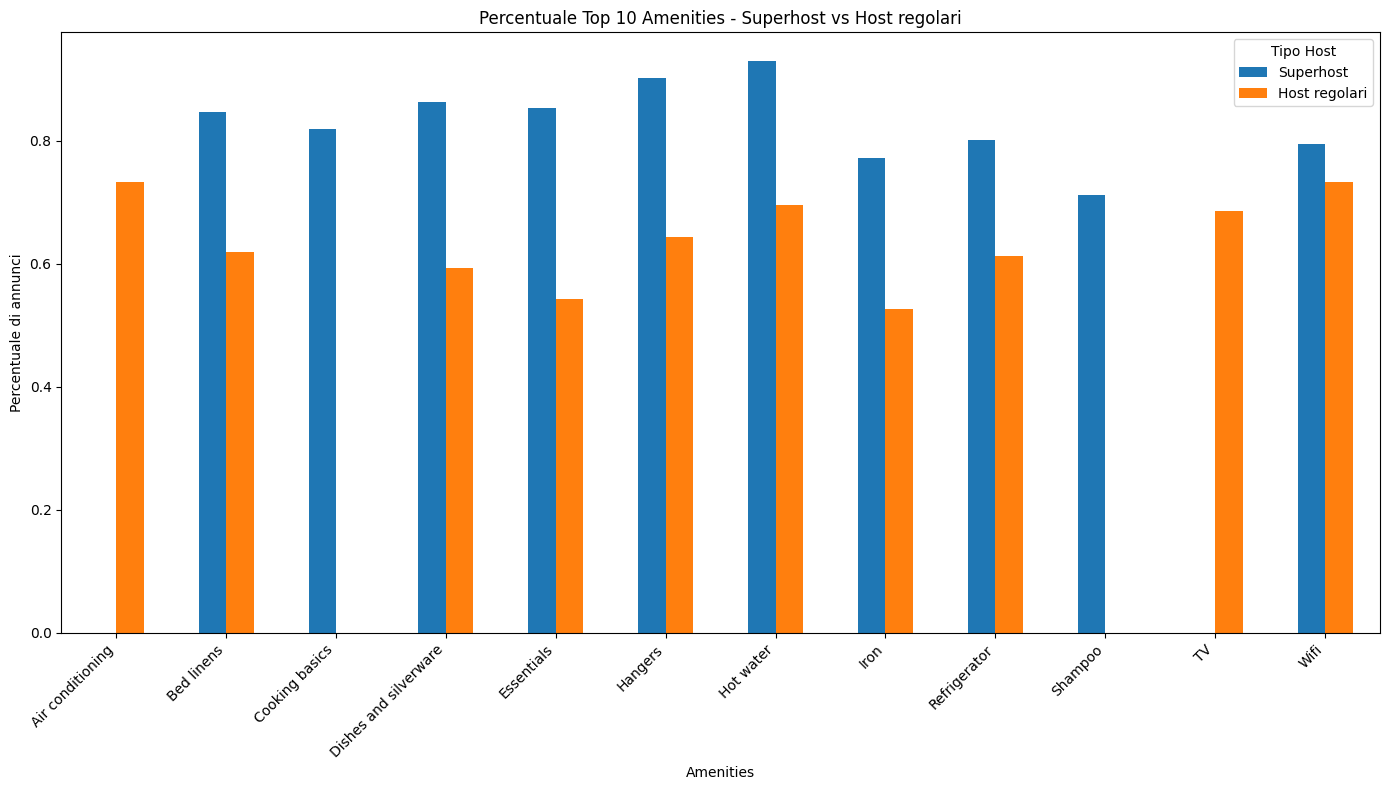

In [34]:
# Creazione dataframe per confronto grafico
df_amenities = pd.DataFrame({
    'Superhost': top_amenities_super,
    'Host regolari': top_amenities_host
}).fillna(0)

# Grafico comparativo amenities
plt.figure(figsize=(14, 8))
df_amenities.plot(kind='bar', figsize=(14, 8))
plt.title("Percentuale Top 10 Amenities - Superhost vs Host regolari")
plt.ylabel("Percentuale di annunci")
plt.xlabel("Amenities")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo Host')
plt.tight_layout()
plt.show()

## Analisi distribuzione recensioni

In [35]:
# Statistiche recensioni superhost
super_with_reviews = (superhost['review_count'] > 0).mean()
super_many_reviews = (superhost['review_count'] > 10).mean()

print(f"\nSuperhost:")
print(f"  Annunci con almeno 1 recensione: {super_with_reviews:.2%}")
print(f"  Annunci con più di 10 recensioni: {super_many_reviews:.2%}")

# Statistiche recensioni host regolari
host_with_reviews = (non_superhost['review_count'] > 0).mean()
host_many_reviews = (non_superhost['review_count'] > 10).mean()

print(f"\nHost regolari:")
print(f"  Annunci con almeno 1 recensione: {host_with_reviews:.2%}")
print(f"  Annunci con più di 10 recensioni: {host_many_reviews:.2%}")


Superhost:
  Annunci con almeno 1 recensione: 94.78%
  Annunci con più di 10 recensioni: 78.86%

Host regolari:
  Annunci con almeno 1 recensione: 58.61%
  Annunci con più di 10 recensioni: 25.82%


In [36]:
!pip install folium geopandas

import folium
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement

# Calcolo totale recensioni per ogni location
location_reviews = listings.groupby(
    ['id', 'name', 'latitude', 'longitude', 'host_is_superhost', 'price_clean']
)['review_count'].sum().reset_index()
location_reviews.rename(columns={'review_count': 'total_reviews'}, inplace=True)

# Prendi le top 100 location per numero di recensioni
top_100_locations = location_reviews.sort_values(by='total_reviews', ascending=False).head(100).copy()

# Crea mappa centrata sulla Sicilia
sicily_center = [37.5, 14.0]
m = folium.Map(location=sicily_center, zoom_start=8)

# Aggiungi MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Colori per host e superhost
host_color = 'blue'
superhost_color = 'red'

# Aggiungi marker per ogni location
for _, row in top_100_locations.iterrows():
    host_type = 'Superhost' if row['host_is_superhost'] == 't' else 'Host'
    marker_color = superhost_color if row['host_is_superhost'] == 't' else host_color
    popup_text = f"""
    <b>{row['name']}</b><br>
    Tipo Host: {host_type}<br>
    Recensioni totali: {int(row['total_reviews'])}<br>
    Prezzo: ${row['price_clean']:.2f}
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color=marker_color)
    ).add_to(marker_cluster)

# Aggiungi legenda semplice
template = f"""
{{% macro html(this, kwargs) %}}
<div style="position: fixed; bottom: 50px; left: 50px; width: 150px; z-index:9999; font-size:14px;">
  &nbsp; Legenda <br>
  &nbsp; <i class="fa fa-map-marker fa-2x" style="color:{superhost_color}"></i>&nbsp; Superhost <br>
  &nbsp; <i class="fa fa-map-marker fa-2x" style="color:{host_color}"></i>&nbsp; Host <br>
</div>
{{% endmacro %}}
"""
macro = MacroElement()
macro._template = Template(template)
m.get_root().add_child(macro)

# Visualizza la mappa
m


In [37]:
import folium
from folium.plugins import HeatMap

# Calcolo totale recensioni per ogni location
location_reviews = listings.groupby(
    ['id', 'name', 'latitude', 'longitude', 'host_is_superhost', 'price_clean']
)['review_count'].sum().reset_index()
location_reviews.rename(columns={'review_count': 'total_reviews'}, inplace=True)

# Prendi le location per numero di recensioni
top_100_locations = location_reviews.sort_values(by='total_reviews', ascending=False).copy()

# Crea mappa centrata sulla Sicilia
sicily_center = [37.5, 14.0]
m = folium.Map(location=sicily_center, zoom_start=8)

# Prepara i dati per la heatmap: [lat, lon, peso]
heat_data = [
    [row['latitude'], row['longitude'], row['total_reviews']]
    for _, row in top_100_locations.iterrows()
]

# Aggiungi HeatMap
HeatMap(heat_data, radius=15, max_zoom=12).add_to(m)

# Visualizza la mappa
m


In [40]:
# Filtra il dataframe per includere solo i superhost
superhost_locations = listings[listings['host_is_superhost'] == 't'].copy()

# Calcola il totale recensioni per ogni location dei superhost
location_reviews_superhost = superhost_locations.groupby(
    ['id', 'name', 'latitude', 'longitude', 'price_clean']
)['review_count'].sum().reset_index()
location_reviews_superhost.rename(columns={'review_count': 'total_reviews'}, inplace=True)

# Prendi le location per numero di recensioni (non solo top 100, prendiamo tutti i superhost)
sorted_superhost_locations = location_reviews_superhost.sort_values(by='total_reviews', ascending=False).copy()

# Crea mappa centrata sulla Sicilia
sicily_center = [37.5, 14.0]
m_superhost_heatmap = folium.Map(location=sicily_center, zoom_start=8)

# Prepara i dati per la heatmap: [lat, lon, peso]
# Usa il numero di recensioni come peso per la heatmap
heat_data_superhost = [
    [row['latitude'], row['longitude'], row['total_reviews']]
    for _, row in sorted_superhost_locations.iterrows()
]

# Aggiungi HeatMap solo per i superhost
HeatMap(heat_data_superhost, radius=15, max_zoom=12).add_to(m_superhost_heatmap)

# Visualizza la mappa dei superhost
print("Heatmap solo per Superhost:")
m_superhost_heatmap

Heatmap solo per Superhost:
